In [1]:
# 사이킷런에서 붓꽃 데이터셋을 가지고 온다.
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [2]:
# 트레인, 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


- 분류가 된 모습을 보인다.

In [4]:
# 데이터 표준화

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
display(X_train)

display(X_train_std)

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2],
       [5.6, 2.4],
       [6.6, 2.1],
       [1.2, 0.2],
       [5.8, 1.6],
       [4.6, 1.3],
       [3.3, 1. ],
       [3.9, 1.4],
       [1.3, 0.2],
       [4.7, 1.2],
       [4. , 1.3],
       [5.1, 1.9],
       [1.9, 0.2],
       [3.5, 1. ],
       [3.9, 1.2],
       [1.6, 0.2],
       [4.8, 1.8],
       [6.9, 2.3],
       [4.5, 1.5],
       [4.5, 1.3],
       [3.8, 1.1],
       [5.6, 2.4],
       [4.7, 1.4],
       [5.6, 1.4],
       [5.8, 2.2],
       [5.1, 2.4],
       [4.1, 1.3],
       [1.5, 0.4],
       [6.7, 2.2],
       [5. , 1.9],
       [4.8, 1.8],
       [5.6, 2.1],
       [4.2, 1.5],
       [6.7, 2. ],
       [5.5, 1.8],
       [1.6, 0.2],
       [4.9, 1.8],
       [1.4, 0.2],
       [5.1, 1.5],
       [1.9, 0.4],
       [1. , 0.2],
       [4.9, 1.5],
       [1.5, 0.2],
       [1.1, 0.1],
       [5.5, 1.8],
       [4.7, 1.5],
       [1.7, 0.3],
       [3.5, 1. ],
       [4.1,

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [ 0.84243039,  1.44587881],
       [ 1.0655204 ,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.0097479 ,  1.57698181],
       [ 1.56747294,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.12129291,  0.5281578 ],
       [ 0.45202286,  0.1348488 ],
       [-0.27301968, -0.2584602 ],
       [ 0.06161534,  0.2659518 ],
       [-1.38846976, -1.30728421],
       [ 0.50779537,  0.0037458 ],
       [ 0.11738784,  0.1348488 ],
       [ 0.73088538,  0.92146681],
       [-1.05383474, -1.30728421],
       [-0.16147468, -0.2584602 ],
       [ 0.06161534,  0.0037458 ],
       [-1.22115225, -1.30728421],
       [ 0.56356787,  0.79036381],
       [ 1.73479045,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.39625036,  0.1348488 ],
       [ 0.00584283, -0.1273572 ],
       [ 1.0097479 ,  1.57698181],
       [ 0.50779537,  0.2659518 ],
       [ 1.0097479 ,  0.2659518 ],
       [ 1.12129291,

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

- 퍼셉트론과 SGDClassifier와 비슷하다.
- 퍼셉트론 => SGDClassifier(loss = 'perceptron')

In [7]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [8]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [9]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

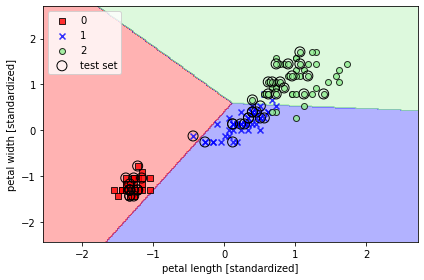

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()